In [145]:
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
data = pd.read_csv('C:\\Users\\Marques\\Desktop\\Análise Google Apps\\data\\googleplaystore.csv')
data = pd.DataFrame(data)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [147]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Limpeza dos dados

In [149]:
#Eliminando colunas sem relevancia para análsie
data = data.drop(columns=['Genres', 'Last Updated', 'Current Ver','Android Ver'])

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


In [151]:
# Tratando dados nulos da coluna Rating
data['Rating'].isnull().sum()

1474

In [152]:
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [153]:
data = data.drop(data[data['Rating'] == 19].index)

In [154]:
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
#Delimitar que a média possua sua casa pós o ponto
data['Rating'] = data['Rating'].round(2)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
dtypes: float64(1), object(8)
memory usage: 846.9+ KB


In [156]:
data['Rating'].describe()

count    10840.000000
mean         4.191518
std          0.478907
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [157]:
data['Installs'] = data['Installs'].str.replace('+', '', regex=False)

In [158]:
data['Installs'] = data['Installs'].str.replace(',', '', regex=False)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,10000,Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,500000,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,5000000,Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,50000000,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,100000,Free,0,Everyone
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,5000,Free,0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100,Free,0,Everyone
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,1000,Free,0,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,1000,Free,0,Mature 17+


In [159]:
data['Installs'] = data['Installs'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
dtypes: float64(1), int32(1), object(7)
memory usage: 804.5+ KB


In [160]:
data['Type'].isnull().sum()

1

In [161]:
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [162]:
#Localizar o valor NaN na coluna Type
data[data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
9148,Command & Conquer: Rivals,FAMILY,4.19,0,Varies with device,0,NaN,0,Everyone 10+


In [163]:
data = data.drop(data[data['Type'].isnull()].index)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
dtypes: float64(1), int32(1), object(7)
memory usage: 804.5+ KB


In [165]:
#Analisando a coluna Price
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [166]:
data['Price'] = data['Price'].str.replace('$', '', regex=False)

In [167]:
data['Price'] = data['Price'].astype(float)

In [168]:
data['Price'].value_counts().sort_values()

Price
3.04          1
109.99        1
1.61          1
3.08          1
394.99        1
          ...  
4.99         72
1.99         73
2.99        129
0.99        148
0.00      10039
Name: count, Length: 92, dtype: int64

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
dtypes: float64(2), int32(1), object(6)
memory usage: 804.5+ KB


In [170]:
# Verificando dados duplicados
data.duplicated().sum()

485

In [171]:
# Ver algumas das linhas duplicadas
duplicates_exact = data[data.duplicated(keep=False)]
duplicates_exact.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,5000000,Free,0.0,Everyone
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,50000000,Free,0.0,Everyone
193,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,0.0,Everyone
204,Box,BUSINESS,4.2,159872,Varies with device,10000000,Free,0.0,Everyone
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000,Free,0.0,Everyone
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0.0,Everyone
228,SignEasy | Sign and Fill PDF and other Documents,BUSINESS,4.3,8978,Varies with device,1000000,Free,0.0,Everyone
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0.0,Everyone
230,Genius Scan - PDF Scanner,BUSINESS,4.4,42492,Varies with device,1000000,Free,0.0,Everyone
231,Tiny Scanner - PDF Scanner App,BUSINESS,4.7,286897,39M,10000000,Free,0.0,Everyone


In [172]:
# Quantos apps únicos existem
n_unique_apps = data['App'].nunique()
n_total_rows = len(data)

print("Total de linhas:", n_total_rows)
print("Total de apps únicos:", n_unique_apps)
print("Média de linhas por app:", n_total_rows / n_unique_apps)

# Ver apps que aparecem mais de uma vez
apps_duplicated = data['App'].value_counts()
apps_duplicated[apps_duplicated > 1].head(10)

Total de linhas: 10839
Total de apps únicos: 9658
Média de linhas por app: 1.122282045972251


App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Name: count, dtype: int64

In [173]:
# Remove linhas completamente duplicadas
data_clean = data.drop_duplicates()

print("Antes:", len(data))
print("Depois de remover duplicatas exatas:", len(data_clean))

Antes: 10839
Depois de remover duplicatas exatas: 10354


# Salvando base de dados tratada 

In [174]:
data_clean.to_csv('C:\\Users\\Marques\\Desktop\\Análise Google Apps\\data\\googleplaystore_limpo.csv', index=False)

# Analisando os dados

In [175]:
data_app = pd.read_csv('C:\\Users\\Marques\\Desktop\\Análise Google Apps\\data\\googleplaystore_limpo.csv')
data_app 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
10349,Sya9a Maroc - FR,FAMILY,4.50,38,53M,5000,Free,0.0,Everyone
10350,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100,Free,0.0,Everyone
10351,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,1000,Free,0.0,Everyone
10352,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,1000,Free,0.0,Mature 17+


In [176]:
data_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
10349,Sya9a Maroc - FR,FAMILY,4.50,38,53M,5000,Free,0.0,Everyone
10350,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100,Free,0.0,Everyone
10351,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,1000,Free,0.0,Everyone
10352,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,1000,Free,0.0,Mature 17+


In [177]:
# Apps  gratuitos vs pagos
app_gratuitos = (data_app["Price"] == 0).value_counts()
app_gratuitos

Price
True     9589
False     765
Name: count, dtype: int64

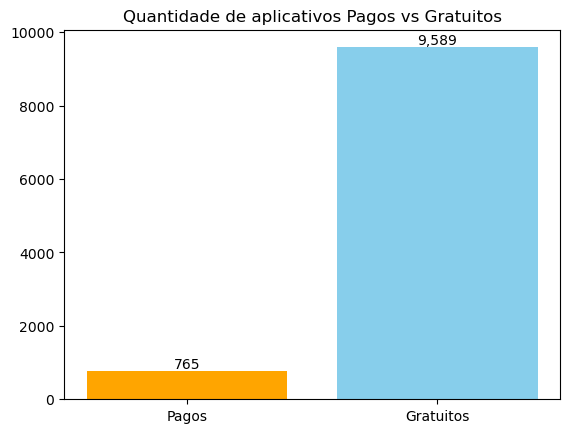

In [178]:
bars = plt.bar(app_gratuitos.index, app_gratuitos.values, color=['skyblue', 'orange'])
plt.title('Quantidade de aplicativos Pagos vs Gratuitos')

#Identificar qual item cada barra representa
plt.xticks([0, 1], ['Pagos', 'Gratuitos'])

# Adiciona os valores no topo das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():,}', ha='center', va='bottom', fontsize=10)

In [179]:
# Distribuição dos apps por categoria
app_por_categoria = data["Category"].value_counts().head(5)
app_por_categoria

Category
FAMILY      1971
GAME        1144
TOOLS        843
MEDICAL      463
BUSINESS     460
Name: count, dtype: int64

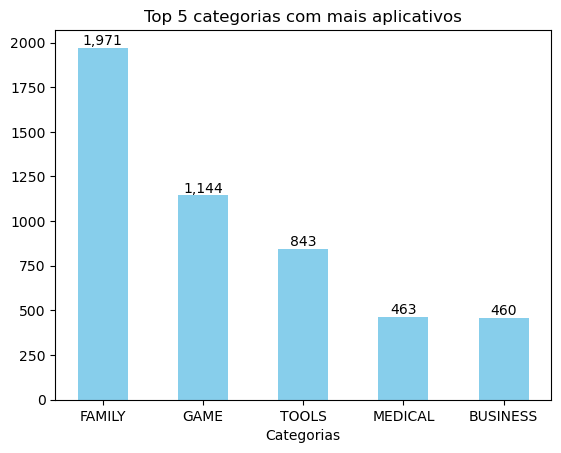

In [180]:
bars = plt.bar(app_por_categoria.index, app_por_categoria.values, width=0.5, color='skyblue')
plt.title('Top 5 categorias com mais aplicativos')
plt.xlabel('Categorias')

# Adiciona os valores no topo das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():,}', ha='center', va='bottom', fontsize=10)

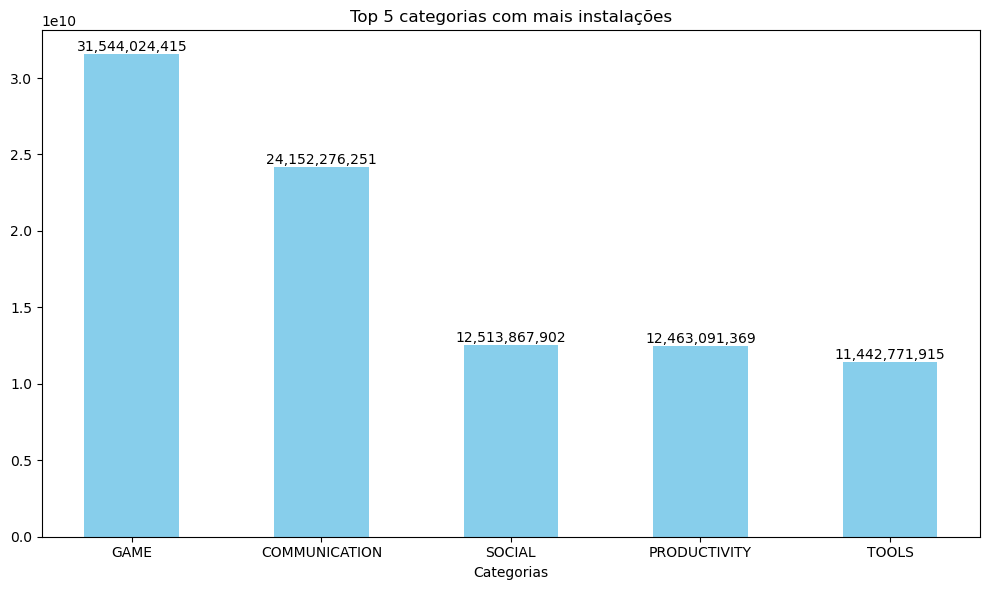

In [210]:
# Agrupa por categoria, soma as instalações, ordena e pega as top 5
categoria_lider_downloads = data_app.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)

# Cria o gráfico de barras
plt.figure(figsize=(10,6))
bars = plt.bar(categoria_lider_downloads.index, categoria_lider_downloads.values, width=0.5, color='skyblue')

# Títulos e rótulos
plt.title('Top 5 categorias com mais instalações')
plt.xlabel('Categorias')



# Adiciona os valores no topo das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [182]:
categoria_lider_dowloads = data_app.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
categoria_lider_dowloads

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11442771915
FAMILY                10041692505
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

In [183]:
#Top 5 aplicativos mais baixados
app_mais_baixados = data_app.groupby('App')['Installs'].sum().sort_values(ascending=False).head(5)
app_mais_baixados

App
Subway Surfers               5000000000
Google Photos                4000000000
Hangouts                     4000000000
Maps - Navigate & Explore    3000000000
Google Drive                 3000000000
Name: Installs, dtype: int64

In [184]:
(data_app["Installs"] == 0).value_counts()

Installs
False    10340
True        14
Name: count, dtype: int64

In [185]:
data_app[data_app['App'] == "Subway Surfers"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
1447,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0.0,Everyone 10+
1493,Subway Surfers,GAME,4.5,27723193,76M,1000000000,Free,0.0,Everyone 10+
1540,Subway Surfers,GAME,4.5,27724094,76M,1000000000,Free,0.0,Everyone 10+
1655,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0.0,Everyone 10+
3450,Subway Surfers,GAME,4.5,27711703,76M,1000000000,Free,0.0,Everyone 10+


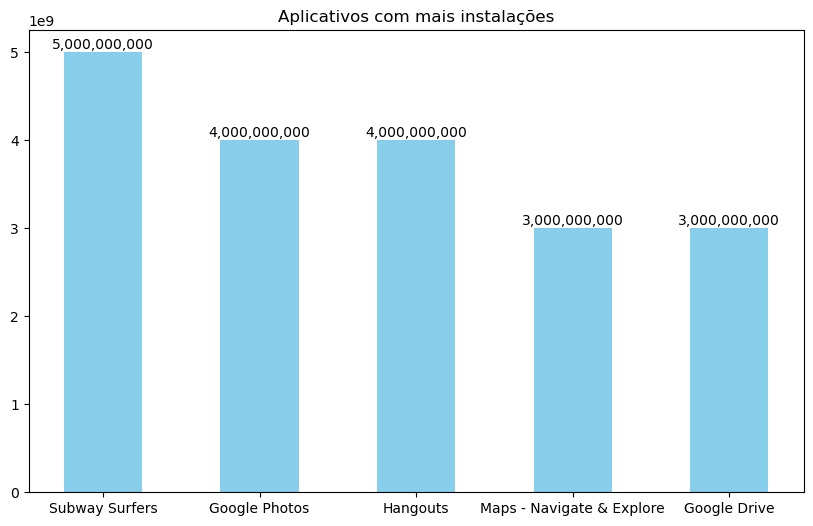

In [212]:
plt.figure(figsize=(10,6))
bars = plt.bar(app_mais_baixados.index, app_mais_baixados.values, width=0.5, color='skyblue')
plt.title('Aplicativos com mais instalações')

# Adiciona os valores no topo das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():,}', ha='center', va='bottom', fontsize=10)

In [217]:
#Verificar preços dos apps mais baixados
data_app[data_app['App'].isin(app_mais_baixados.index)][['App', 'Price']]

,App,Price
308,Hangouts,0.0
352,Hangouts,0.0
425,Hangouts,0.0
1447,Subway Surfers,0.0
1493,Subway Surfers,0.0
1540,Subway Surfers,0.0
1655,Subway Surfers,0.0
2458,Google Photos,0.0
2503,Google Photos,0.0
2532,Google Photos,0.0


In [187]:
# analisar avaliações dos aplicativos mais baixados
data_app[data_app['App'].isin(app_mais_baixados.index)][['App', 'Reviews']]


,App,Reviews
308,Hangouts,3419249
352,Hangouts,3419433
425,Hangouts,3419513
1447,Subway Surfers,27722264
1493,Subway Surfers,27723193
1540,Subway Surfers,27724094
1655,Subway Surfers,27725352
2458,Google Photos,10858556
2503,Google Photos,10858538
2532,Google Photos,10859051


In [188]:
# Análise das avaliações    
data_app["Rating"].value_counts().sort_index(ascending=False)

Rating
5.00     271
4.90      87
4.80     228
4.70     484
4.60     768
4.50     977
4.40    1032
4.30    1016
4.20     887
4.19    1464
4.10     656
4.00     539
3.90     372
3.80     293
3.70     231
3.60     169
3.50     157
3.40     127
3.30     101
3.20      64
3.10      69
3.00      82
2.90      45
2.80      40
2.70      23
2.60      24
2.50      20
2.40      19
2.30      20
2.20      14
2.10       8
2.00      12
1.90      12
1.80       8
1.70       8
1.60       4
1.50       3
1.40       3
1.20       1
1.00      16
Name: count, dtype: int64

In [189]:
melhores_apps_avaliados = data_app[(data_app['Rating'] >= 4.5) & (data_app['Rating'] <= 5.0)].sort_values(by='Rating', ascending=False)
melhores_apps_avaliados

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
8711,UP EB Bill Payment & Details,SOCIAL,5.0,3,2.4M,50,Free,0.0,Teen
7260,CQ ESPM,BUSINESS,5.0,2,3.4M,5,Free,0.0,Everyone
6260,BS-Mobile,COMMUNICATION,5.0,1,683k,50,Free,0.0,Everyone
8607,DYPSOET,FAMILY,5.0,8,7.4M,50,Free,0.0,Everyone
5882,BJ Foods,BUSINESS,5.0,3,1.5M,10,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
2467,Waterfall Photo Frames,PHOTOGRAPHY,4.5,10349,11M,1000000,Free,0.0,Everyone
6645,CB Bank Mobile Banking,FINANCE,4.5,1308,3.7M,100000,Free,0.0,Everyone
6642,CB-Mobile Banking,FINANCE,4.5,96,12M,10000,Free,0.0,Everyone
6636,Cricbuzz - Live Cricket Scores & News,SPORTS,4.5,838738,Varies with device,50000000,Free,0.0,Everyone


In [190]:
melhores_apps_avaliados.value_counts().sum()

2815

In [191]:
quantidade_instalacoes = melhores_apps_avaliados['Installs'].sum()
quantidade_instalacoes

45161422183

In [192]:
avaliaçoes_por_categoria = data_app.groupby('Category')['Rating'].sum().sort_values(ascending=False).head(5)
avaliaçoes_por_categoria

Category
FAMILY          8138.96
GAME            4795.03
TOOLS           3423.31
BUSINESS        1765.53
PRODUCTIVITY    1709.27
Name: Rating, dtype: float64

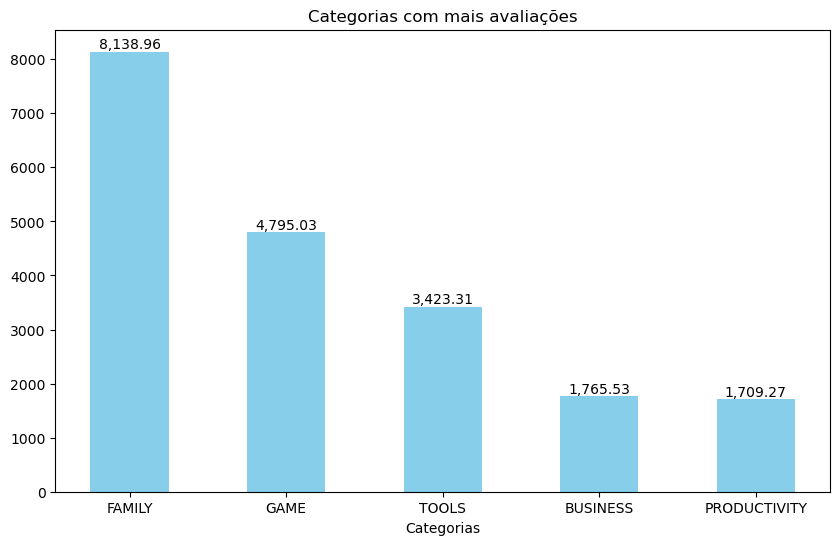

In [193]:
plt.figure(figsize=(10,6))
bars = plt.bar(avaliaçoes_por_categoria.index, avaliaçoes_por_categoria.values, width=0.5, color='skyblue')
plt.title('Categorias com mais avaliações')
plt.xlabel('Categorias')
# Adiciona os valores no topo das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():,}', ha='center', va='bottom', fontsize=10)

In [194]:
categoria_lider_avaliacoes = data_app.groupby('Category')['Rating'].mean().round(2).sort_values(ascending=False).head(5)
categoria_lider_avaliacoes

Category
EDUCATION              4.37
EVENTS                 4.36
ART_AND_DESIGN         4.35
BOOKS_AND_REFERENCE    4.31
PERSONALIZATION        4.30
Name: Rating, dtype: float64

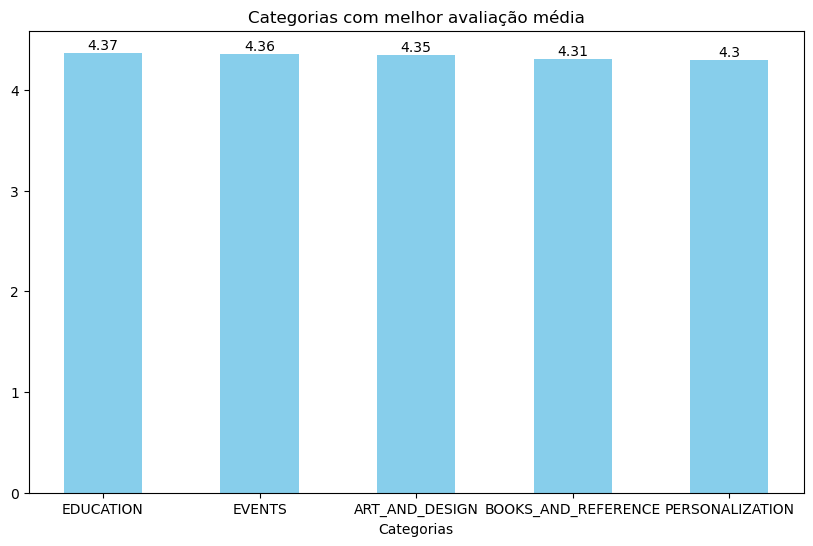

In [195]:
plt.figure(figsize=(10,6))
bars = plt.bar(categoria_lider_avaliacoes.index, categoria_lider_avaliacoes.values, width=0.5, color='skyblue')
plt.title('Categorias com melhor avaliação média')
plt.xlabel('Categorias')
# Adiciona os valores no topo das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():,}', ha='center', va='bottom', fontsize=10)

In [196]:
#Correlação entre reviews x installs
data_app[['Reviews', 'Installs']].corr()

,Reviews,Installs
Reviews,1.000000,0.634996
Installs,0.634996,1.000000


In [197]:
#Correlação entre reviews x rating
data_app[['Reviews', 'Rating']].corr()

,Reviews,Rating
Reviews,1.000000,0.068509
Rating,0.068509,1.000000


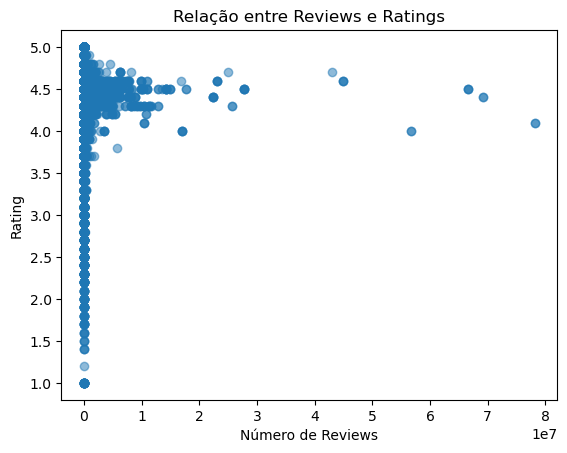

In [198]:
# scatter plot entre Reviews e Ratings
plt.scatter(data_app['Reviews'], data_app['Rating'], alpha=0.5)
plt.title('Relação entre Reviews e Ratings')
plt.xlabel('Número de Reviews')
plt.ylabel('Rating')
plt.show()

In [199]:
data_app.groupby('Rating')['Installs'].sum()

Rating
1.00           5170
1.20           1000
1.40           7000
1.50           1105
1.60         152000
1.70          81700
1.80         519500
1.90         289000
2.00        5040150
2.10         182000
2.20        2130600
2.30         264100
2.40        1284100
2.50        2078100
2.60         442600
2.70        3359700
2.80        3489150
2.90        7191100
3.00       34333880
3.10      106558500
3.20       28674400
3.30       94851800
3.40      109413950
3.50      232078060
3.60      246616750
3.70     1671049960
3.80      622452500
3.90     5067045300
4.00     9591940410
4.10     6220642600
4.19        5963189
4.20    15719637160
4.30    33186746710
4.40    28485969100
4.50    30438418960
4.60    10635931800
4.70     3610275010
4.80      432824990
4.90       43882600
5.00          88823
Name: Installs, dtype: int64

In [200]:
data_app[data_app['Price'].isin(data_app['Price'] > 0)][['Rating', 'Price']].mean()

Rating    4.183525
Price     0.000313
dtype: float64

In [201]:
data_app[data_app['Price'] > 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.70,11442,6.8M,100000,Paid,4.99,Everyone
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.80,10295,39M,100000,Paid,4.99,Everyone
390,Puffin Browser Pro,COMMUNICATION,4.00,18247,Varies with device,100000,Paid,3.99,Everyone
429,"Moco+ - Chat, Meet People",DATING,4.20,1545,Varies with device,10000,Paid,3.99,Mature 17+
430,Calculator,DATING,2.60,57,6.2M,1000,Paid,6.99,Everyone
...,...,...,...,...,...,...,...,...,...
10249,FP VoiceBot,FAMILY,4.19,17,157k,100,Paid,0.99,Mature 17+
10274,Fast Tract Diet,HEALTH_AND_FITNESS,4.40,35,2.4M,1000,Paid,7.99,Everyone
10295,Trine 2: Complete Story,GAME,3.80,252,11M,10000,Paid,16.99,Teen
10298,"sugar, sugar",FAMILY,4.20,1405,9.5M,10000,Paid,1.20,Everyone


In [202]:
#Apps pagos têm, em média, ratings maiores?
rating_medio_app_pago = data_app.groupby(data_app['Price'] > 0)['Rating'].mean().round(2)
rating_medio_app_pago

Price
False    4.18
True     4.25
Name: Rating, dtype: float64

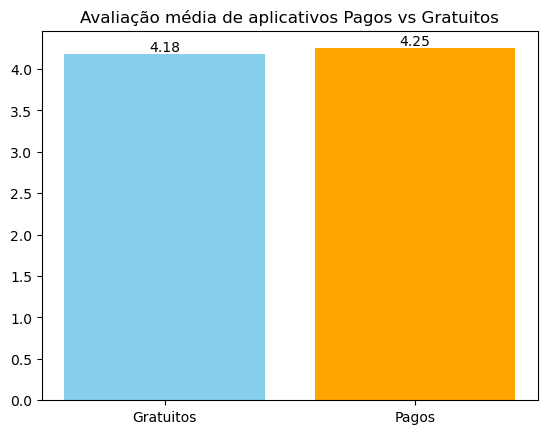

In [218]:

#Mostrar gráfico de barras comparando avaliações médias de apps pagos e gratuitos
bars = plt.bar(rating_medio_app_pago.index, rating_medio_app_pago.values, color=['skyblue', 'orange'])
plt.title('Avaliação média de aplicativos Pagos vs Gratuitos')

#Identificar qual item cada barra representa
plt.xticks([0, 1], ['Gratuitos', 'Pagos'])

# Adiciona os valores no topo das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():,}', ha='center', va='bottom', fontsize=10)


In [204]:
#Apps pagos têm, em média, mais avaliações?
avaliacoes_medias_app_pago = data_app.groupby(data_app['Price'] > 0)['Reviews'].mean().round(2)
avaliacoes_medias_app_pago

Price
False    437443.69
True      11900.55
Name: Reviews, dtype: float64

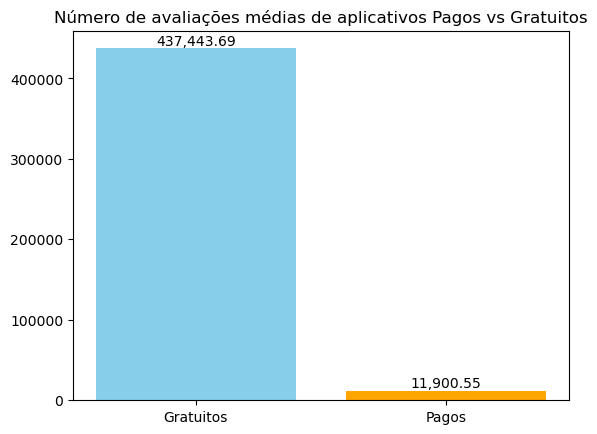

In [205]:
#Mostrar gráfico de barras comparando avaliações médias de apps pagos e gratuitos
bars = plt.bar(avaliacoes_medias_app_pago.index, avaliacoes_medias_app_pago.values, color=['skyblue', 'orange'])
plt.title('Número de avaliações médias de aplicativos Pagos vs Gratuitos')

#Identificar qual item cada barra representa
plt.xticks([0, 1], ['Gratuitos', 'Pagos'])

# Adiciona os valores no topo das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():,}', ha='center', va='bottom', fontsize=10)